<a href="https://colab.research.google.com/github/sinnghabhay80/Data-Science-Projects/blob/master/Countries_requiring_Support.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Using Unsupervised Learning to identify countries that require financial support*

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**# Data Details**

In [ ]:
data_dict = pd.read_csv('data-dictionary.csv')
data_dict

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [ ]:
df = pd.read_csv('Country-data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [ ]:
df.shape

(167, 10)

In [ ]:
df['country'].value_counts()

Afghanistan    1
Morocco        1
Myanmar        1
Namibia        1
Nepal          1
              ..
Georgia        1
Germany        1
Ghana          1
Greece         1
Zambia         1
Name: country, Length: 167, dtype: int64

In [ ]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [ ]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

# Visualizations form the Dataset

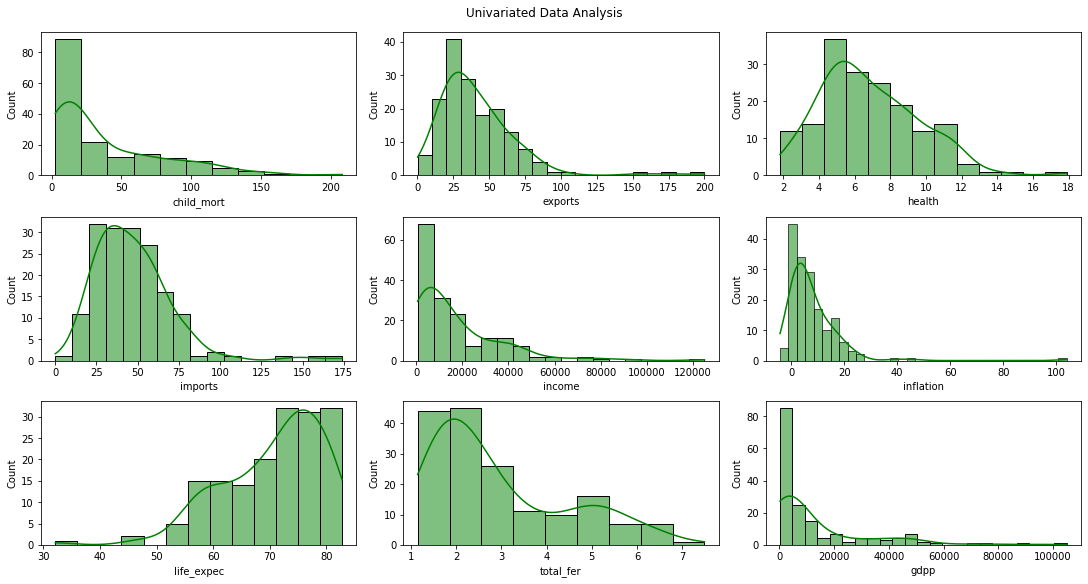

In [ ]:
fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(15,8), constrained_layout=True)
plt.suptitle("Univariated Data Analysis")
ax=ax.flatten()
int_cols= df.select_dtypes(exclude='object').columns
for x, i in enumerate(int_cols):
    sns.histplot(df[i], ax=ax[x], kde=True, color=['green'])

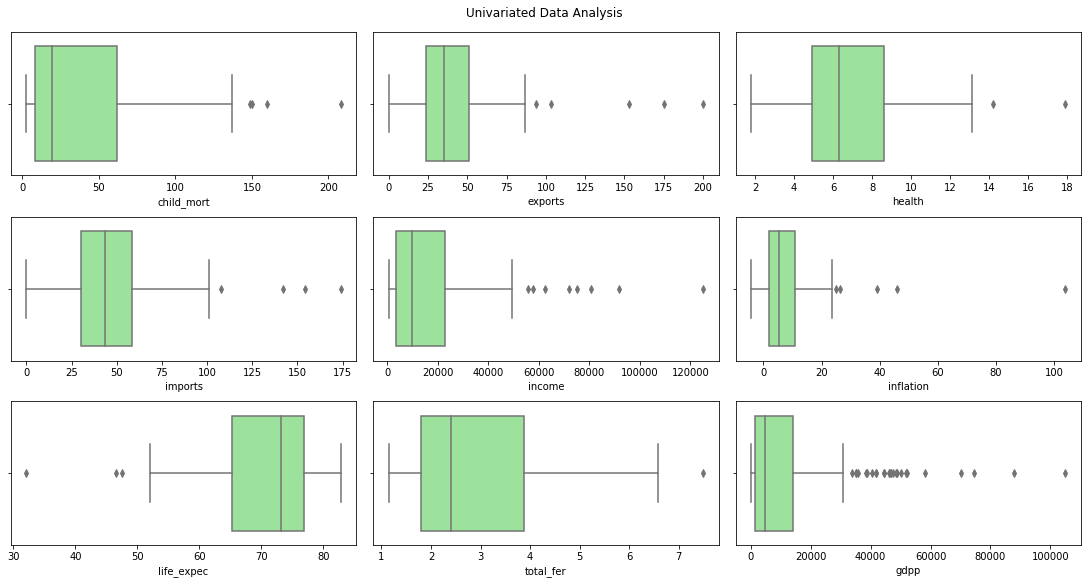

In [ ]:
fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(15,8), constrained_layout=True)
plt.suptitle("Univariated Data Analysis")
ax=ax.flatten()
for x, i in enumerate(int_cols):
    sns.boxplot(x=df[i], ax=ax[x], color='lightgreen')

In [ ]:
imp_cols = ['exports', 'imports', 'income', 'inflation', 'gdpp']

In [ ]:
for i in imp_cols:
    fig=px.choropleth(data_frame=df, locationmode='country names', locations='country', color=i, title=f'* <b style="text-decoration: underline;">{i} rate by countries</b>')
    fig.show()

**From the above choropleth map we can see that 3 clusters, namely, Southern American Continent, African Continent and Southern Part of Asia around Indian and Chinese Subcontinent the GDP and other concerning factors have a very low value.**

In [ ]:
df_imp = pd.DataFrame(columns = imp_cols)
for i in imp_cols:
  df_imp[i] = df[i]

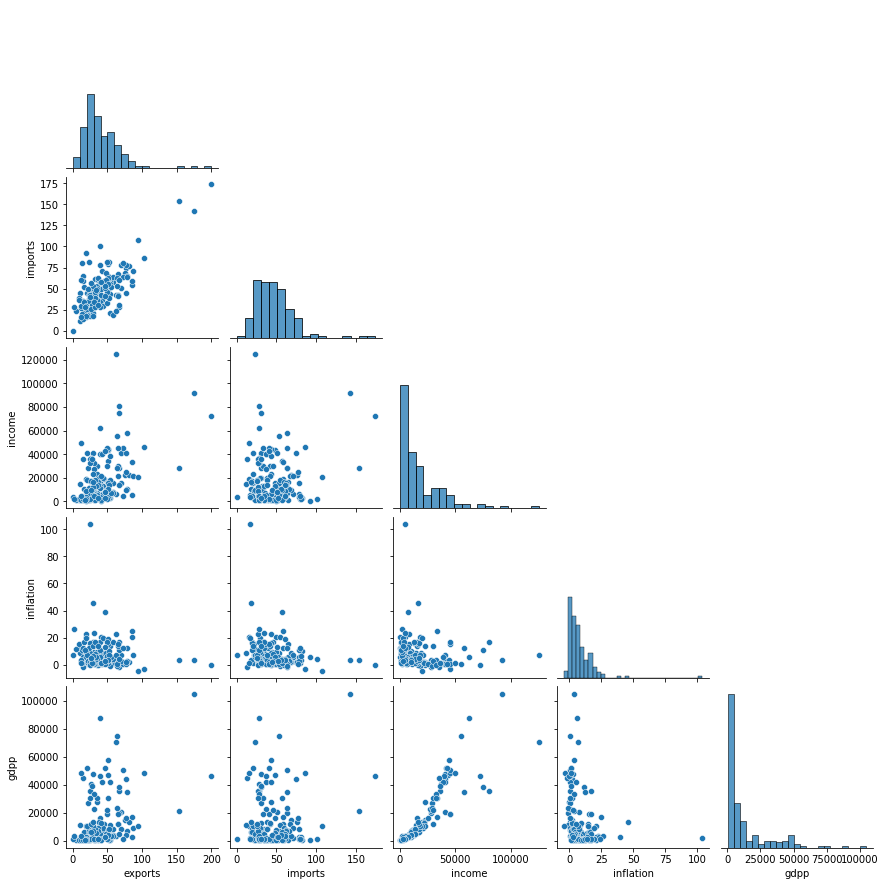

In [ ]:
sns.pairplot(df_imp, corner = True)

**We can observe that:**

* Income is directly proportional to GDP
* Inflation is inversely proportional to GDP
* Imports are less when GDP increases
* Exports are also somewhat lessend when GDP increases



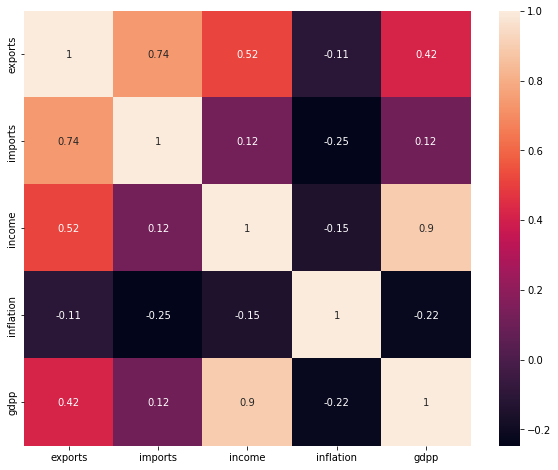

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(df_imp.corr(), annot = True)

*The above correlation heatmap denotes that our observations were somewhat correct.*

# Dendrogram(Hierarchical Clustering)

In [ ]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

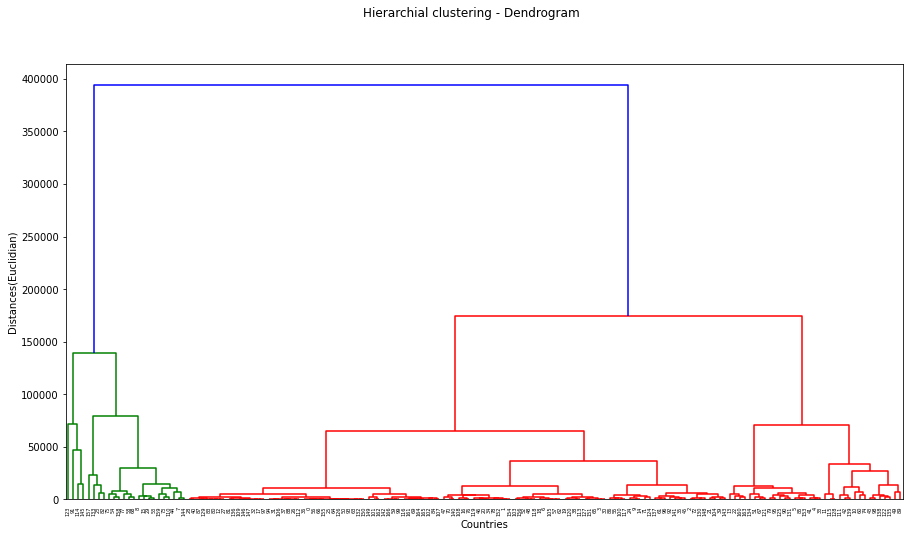

In [ ]:
plt.figure(figsize = (15, 8))
dendrogram = shc.dendrogram(shc.linkage(df_imp, method = 'ward', metric = 'euclidean'))
plt.suptitle('Hierarchial clustering - Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Distances(Euclidian)')
plt.show()

# K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_imp)
df_imp['Labels']=kmeans.labels_
df['Labels'] = kmeans.labels_

In [ ]:
centroids = kmeans.cluster_centers_
centroids

array([[4.38476190e+01, 4.52071429e+01, 1.61576190e+04, 7.26590476e+00,
        8.94761905e+03],
       [5.70450000e+01, 4.82100000e+01, 4.81400000e+04, 2.89060000e+00,
        4.66000000e+04],
       [3.10392738e+01, 4.59448321e+01, 4.32670238e+03, 9.84197619e+00,
        1.94778571e+03],
       [9.23333333e+01, 6.47666667e+01, 9.30000000e+04, 5.51666667e+00,
        8.77000000e+04],
       [5.54666667e+01, 5.07833333e+01, 3.21833333e+04, 5.18388889e+00,
        2.39166667e+04]])

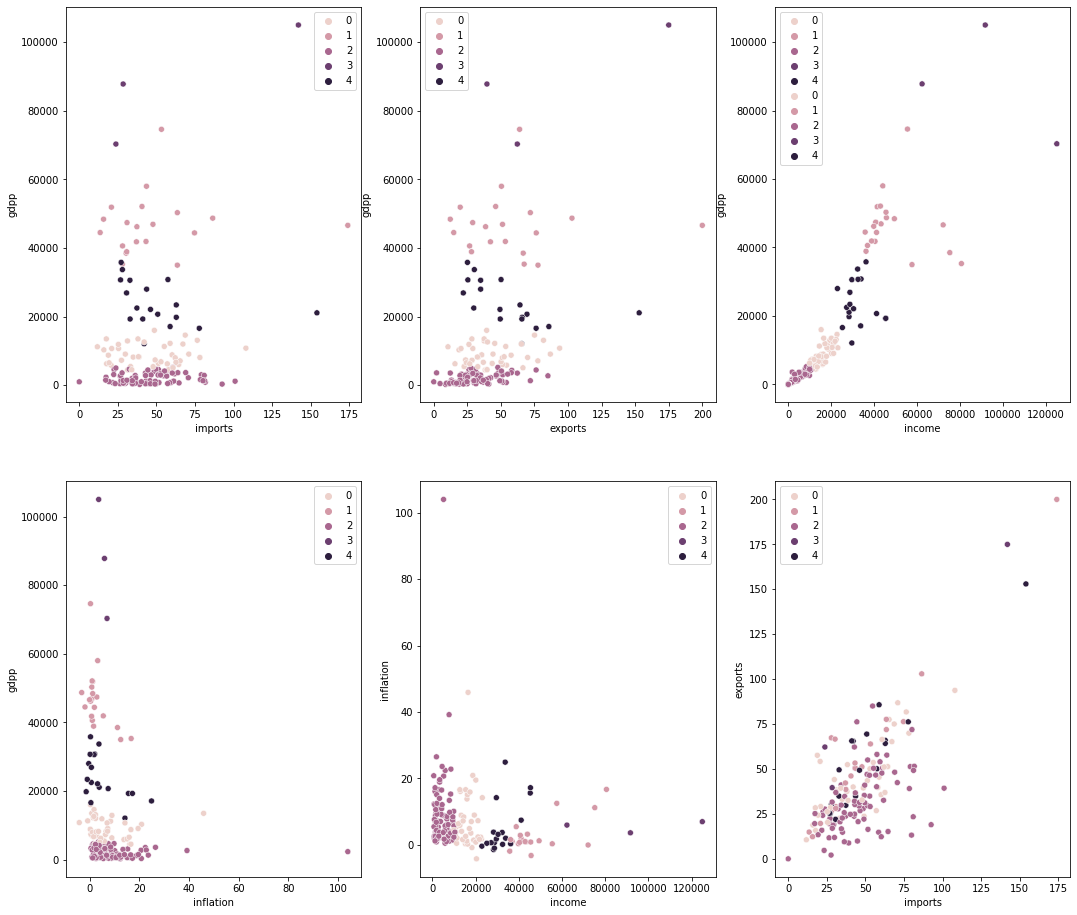

In [ ]:
fig,ax=plt.subplots(nrows=2,ncols=3,figsize=(18, 16))
sns.scatterplot(data=df_imp, x='imports', y='gdpp', hue=kmeans.labels_, ax=ax[0][0])
sns.scatterplot(data=df_imp, x='exports', y='gdpp', hue=kmeans.labels_, ax=ax[0][1])
sns.scatterplot(data=df_imp, x='income', y='gdpp', hue=kmeans.labels_, ax=ax[0][2])
sns.scatterplot(data=df_imp, x='inflation', y='gdpp', hue=kmeans.labels_, ax=ax[1][0])
sns.scatterplot(data=df_imp, x='income', y='inflation', hue=kmeans.labels_, ax=ax[1][1])
sns.scatterplot(data=df_imp, x='imports', y='inflation', hue=kmeans.labels_, ax=ax[0][2])
sns.scatterplot(data=df_imp, x='imports', y='exports', hue=kmeans.labels_, ax=ax[1][2])

In [ ]:
category = {0:'Highly in require of Finance',1:'Moderately in require of Finance',2:'Neutral State Country', 3: 'Moderately Stable Country', 4: 'Highly Stable Country'}
df['Labels'] = df_imp['Labels'].map(category)

In [ ]:
df['Labels'].unique()

array(['Neutral State Country', 'Highly in require of Finance',
       'Moderately in require of Finance', 'Highly Stable Country',
       'Moderately Stable Country'], dtype=object)

In [ ]:
px.choropleth(data_frame=df, locationmode='country names', locations='country', color=df['Labels'], title='* <b style="text-decoration: underline;">Countries by category that need help</b>')

**While our clustering of countries might not accurately show that which countries require help we get thee gist of it by seeing that it shows most of the countries in Africa, South America, and Southern Asia which we classed earlier during Visualizing data.**

In [ ]:
px.choropleth(data_frame=df, locationmode='country names', locations='country', color=df['Labels'], title='* <b style="text-decoration: underline;">South American Countries by category that need help</b>',  scope='south america')

In [ ]:
px.choropleth(data_frame=df, locationmode='country names', locations='country', color=df['Labels'], title='* <b style="text-decoration: underline;">African Countries by category that need help</b>' , scope='africa')

In [ ]:
px.choropleth(data_frame=df, locationmode='country names', locations='country', color=df['Labels'], title='* <b style="text-decoration: underline;">Asian Countries by category that need help</b>', scope='asia')